In [1]:
##############################################################################################################
# DESCRIPTION: 
#              
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/"

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 200 # 600 #10000
hyperparams.BATCH_SIZE = 16
hyperparams.START_NEURONS = 8 # UNET
hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0001_0010"
SAVED_MODEL = "0001_0010-64-unet-n2"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', SAVED_MODEL))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.1418
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.2947

#from tensorflow.keras.optimizers import Adam
#hyperparams.OPTIMIZER = Adam(learning_rate=0.0001)
#from tensorflow.keras.optimizers import Nadam
#hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)
from tensorflow.keras.optimizers import RMSprop
hyperparams.OPTIMIZER = RMSprop(learning_rate = 0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelC as train
import ReportsK as reports
import UnetI as model_factory

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9211928418738947518
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1291577344
locality {
  bus_id: 1
  links {
  }
}
incarnation: 362263364295377883
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
]
Tensorflow version: 2.6.0
Keras Version: 2.6.0
GPU is available


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
##################
# MODEL DEFINITION
##################

model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Loss=mean_absolute_error
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 8)    80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 8)    584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 8)    0           conv2d_1[0][0]                   
_____________________________________________________________________

{'name': 'RMSprop',
 'learning_rate': 0.0001,
 'decay': 0.0,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

In [6]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/
Noisy files:20312
Nitid files:20312
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/validation/
Noisy files:5011
Nitid files:5011


In [7]:
##################
# TRAIN MODEL
##################
hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience = 150 )

Epoch 1/200
1270/1270 [==============================] - 33s 22ms/step - loss: 0.0759 - val_loss: 0.0545
Epoch 2/200
1270/1270 [==============================] - 27s 21ms/step - loss: 0.0449 - val_loss: 0.0463
Epoch 3/200
1270/1270 [==============================] - 27s 21ms/step - loss: 0.0429 - val_loss: 0.0457
Epoch 4/200
1270/1270 [==============================] - 27s 21ms/step - loss: 0.0415 - val_loss: 0.0462
Epoch 5/200
1270/1270 [==============================] - 27s 21ms/step - loss: 0.0407 - val_loss: 0.0444
Epoch 6/200
1270/1270 [==============================] - 27s 21ms/step - loss: 0.0360 - val_loss: 0.0482
Epoch 7/200
1270/1270 [==============================] - 27s 21ms/step - loss: 0.0326 - val_loss: 0.0565
Epoch 8/200
1270/1270 [==============================] - 27s 21ms/step - loss: 0.0316 - val_loss: 0.0474
Epoch 9/200
1270/1270 [==============================] - 27s 21ms/step - loss: 0.0306 - val_loss: 0.0455
Epoch 10/200
1270/1270 [==============================]

1270/1270 [==============================] - 35s 27ms/step - loss: 0.0219 - val_loss: 0.0306
Epoch 79/200
1270/1270 [==============================] - 35s 27ms/step - loss: 0.0219 - val_loss: 0.0281
Epoch 80/200
1270/1270 [==============================] - 35s 27ms/step - loss: 0.0217 - val_loss: 0.0263
Epoch 81/200
1270/1270 [==============================] - 35s 27ms/step - loss: 0.0218 - val_loss: 0.0284
Epoch 82/200
1270/1270 [==============================] - 35s 27ms/step - loss: 0.0218 - val_loss: 0.0303
Epoch 83/200
1270/1270 [==============================] - 35s 28ms/step - loss: 0.0217 - val_loss: 0.0326
Epoch 84/200
1270/1270 [==============================] - 35s 27ms/step - loss: 0.0216 - val_loss: 0.0317
Epoch 85/200
1270/1270 [==============================] - 35s 27ms/step - loss: 0.0217 - val_loss: 0.0290
Epoch 86/200
1270/1270 [==============================] - 35s 27ms/step - loss: 0.0216 - val_loss: 0.0260
Epoch 87/200
1270/1270 [==============================] - 3

Epoch 155/200
1270/1270 [==============================] - 35s 27ms/step - loss: 0.0196 - val_loss: 0.0273
Epoch 156/200
1270/1270 [==============================] - 35s 27ms/step - loss: 0.0196 - val_loss: 0.0248
Epoch 157/200
1270/1270 [==============================] - 35s 28ms/step - loss: 0.0197 - val_loss: 0.0261
Epoch 158/200
1270/1270 [==============================] - 35s 28ms/step - loss: 0.0196 - val_loss: 0.0280
Epoch 159/200
1270/1270 [==============================] - 35s 28ms/step - loss: 0.0196 - val_loss: 0.0299
Epoch 160/200
1270/1270 [==============================] - 35s 28ms/step - loss: 0.0195 - val_loss: 0.0251
Epoch 161/200
1270/1270 [==============================] - 35s 27ms/step - loss: 0.0194 - val_loss: 0.0245
Epoch 162/200
1270/1270 [==============================] - 35s 27ms/step - loss: 0.0195 - val_loss: 0.0254
Epoch 163/200
1270/1270 [==============================] - 35s 28ms/step - loss: 0.0196 - val_loss: 0.0303
Epoch 164/200
1270/1270 [============

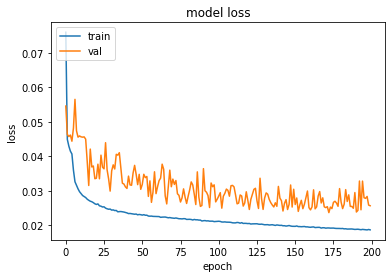

In [8]:
##################
# REPORTS
##################

reports.plotHistory( hist )

In [9]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Images count =5011
Best RMSENZ  =4728 (0.94)
Best MAENZ   =4717 (0.94)
Best Accuracy=4580 (0.91)
RMSE-NZ  Pred=0.0324  Noisy=0.1009
MAE-NZ   Pred=0.0257  Noisy=0.0916
PSNR     Pred=14.2 dB Noisy=7.8 dB
Accuracy Pred=0.37    Noisy=0.14
SSM      Pred=0.80    Noisy=0.46
HOG MSE  Pred=0.09    Noisy=0.08


Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test/
Noisy files:8
Nitid files:8
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0338_00_02_14_noisy_idx025.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0338_00_02_14_nitid_idx026.tif


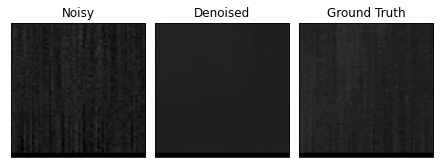

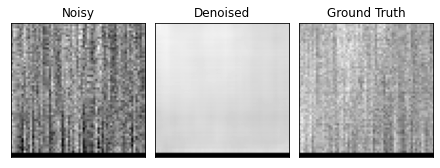

RMSE-NZ  Pred=0.0202  Noisy=0.0432 BEST
MAE-NZ   Pred=0.0158  Noisy=0.0347 BEST
PSNR     Pred=20.2 dB Noisy=13.6 dB BEST
Accuracy Pred=0.40    Noisy=0.18 BEST
SSM      Pred=0.79    Noisy=0.57
HOG MSE  Pred=0.13    Noisy=0.05
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0338_01_00_11_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0338_01_00_11_nitid_idx008.tif


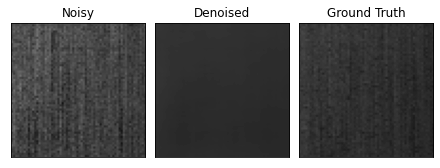

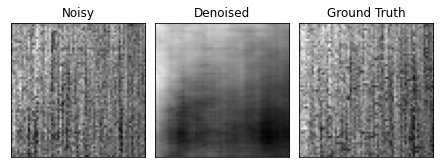

RMSE-NZ  Pred=0.0268  Noisy=0.0960 BEST
MAE-NZ   Pred=0.0214  Noisy=0.0833 BEST
PSNR     Pred=20.5 dB Noisy=9.5 dB BEST
Accuracy Pred=0.29    Noisy=0.04 BEST
SSM      Pred=0.68    Noisy=0.33
HOG MSE  Pred=0.08    Noisy=0.05
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0338_01_00_4_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0338_01_00_4_nitid_idx008.tif


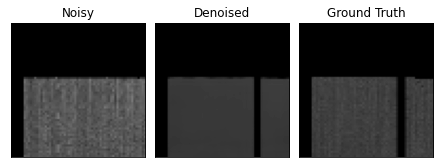

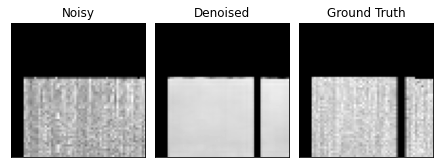

RMSE-NZ  Pred=0.0276  Noisy=0.1328 BEST
MAE-NZ   Pred=0.0160  Noisy=0.1105 BEST
PSNR     Pred=20.9 dB Noisy=7.2 dB BEST
Accuracy Pred=0.57    Noisy=0.02 BEST
SSM      Pred=0.87    Noisy=0.67
HOG MSE  Pred=0.09    Noisy=0.05
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0356_00_00_13_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0356_00_00_13_nitid_idx008.tif


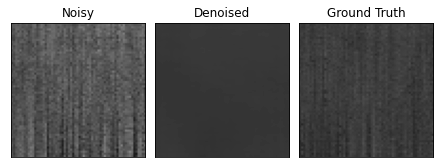

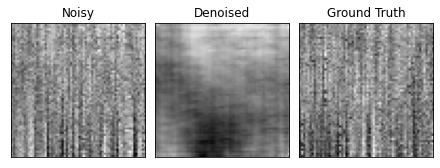

RMSE-NZ  Pred=0.0340  Noisy=0.1163 BEST
MAE-NZ   Pred=0.0279  Noisy=0.1024 BEST
PSNR     Pred=19.7 dB Noisy=9.0 dB BEST
Accuracy Pred=0.20    Noisy=0.03 BEST
SSM      Pred=0.64    Noisy=0.29
HOG MSE  Pred=0.04    Noisy=0.02
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0356_08_03_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0356_08_03_12_nitid_idx134.tif


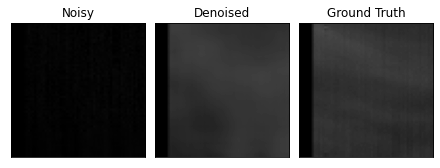

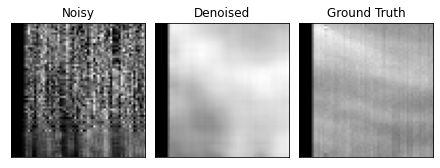

RMSE-NZ  Pred=0.0272  Noisy=0.1832 BEST
MAE-NZ   Pred=0.0214  Noisy=0.1808 BEST
PSNR     Pred=20.7 dB Noisy=4.1 dB BEST
Accuracy Pred=0.32    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.12
HOG MSE  Pred=0.03    Noisy=0.05
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0367_00_01_11_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0367_00_01_11_nitid_idx017.tif


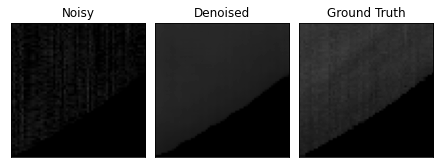

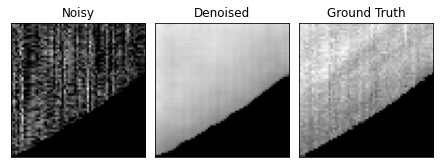

RMSE-NZ  Pred=0.0335  Noisy=0.1267 BEST
MAE-NZ   Pred=0.0248  Noisy=0.1105 BEST
PSNR     Pred=17.4 dB Noisy=5.8 dB BEST
Accuracy Pred=0.36    Noisy=0.16 BEST
SSM      Pred=0.86    Noisy=0.47
HOG MSE  Pred=0.05    Noisy=0.02
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0367_01_01_1_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0367_01_01_1_nitid_idx017.tif


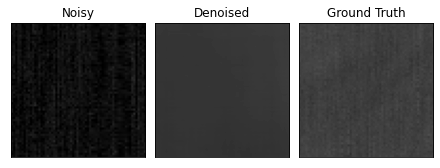

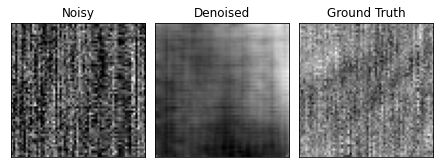

RMSE-NZ  Pred=0.0428  Noisy=0.1983 BEST
MAE-NZ   Pred=0.0385  Noisy=0.1950 BEST
PSNR     Pred=17.3 dB Noisy=3.9 dB BEST
Accuracy Pred=0.07    Noisy=0.00 BEST
SSM      Pred=0.79    Noisy=0.25
HOG MSE  Pred=0.07    Noisy=0.03
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0377_07_03_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0377_07_03_12_nitid_idx134.tif


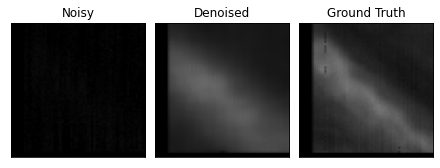

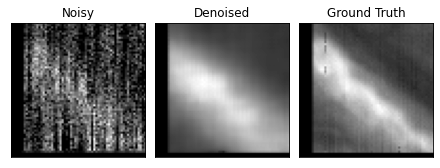

RMSE-NZ  Pred=0.0364  Noisy=0.2152 BEST
MAE-NZ   Pred=0.0269  Noisy=0.1919 BEST
PSNR     Pred=22.0 dB Noisy=6.5 dB BEST
Accuracy Pred=0.30    Noisy=0.00 BEST
SSM      Pred=0.86    Noisy=0.14
HOG MSE  Pred=0.05    Noisy=0.17
******************************************************


In [10]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
test_noisy, test_nitid = dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )

In [11]:
model.save(os.path.abspath(os.path.join('../../../saves/', SAVED_MODEL)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-unet-n2\assets
